# Анализ вакансий Data Analyst и Data Scientist

Цель работы - проанализировать вакансии аналитиков данных и специалистов по Data Science. Сравнить количество их, распределение по грейдам, требования и предлагаемые заработные платы в зависимости от грейда, а также формы занятости и график работы.

# Оглавление

## 1.[Открытие и предобработка](#start)
## 2.[Исследовательский анализ](#analysis)
### [Количество и доля вакансий Data Scientist по грейдам](#1)
### [Количество и доля вакансий Data Analyst по грейдам](#2)
### [Ожидаемые hard skills для Data Scientist](#3)
### [Ожидаемые hard skills для Data Analyst](#4)
### [Ожидаемые soft skills для Data Scientist](#5)
### [Ожидаемые soft skills для Data Analyst](#6)
### [Топ работодателей для Data Scientist](#7)
### [Топ работодателей для Data Analyst](#8)
### [Заработная плата Data Scientist](#9)
### [Заработная плата Data Analyst](#10)
### [Занятость и график работы](#11)
### [Распределение вакансий по месяцам и дням недели](#12)
## 3.[Выводы](#sum)

## 1.Открытие и предобработка <a id="start"></a>

Нам нужно исследовать вакансии Data Scientist и Data Analyst, размещенные на hh.ru в марте и апреле 2024 года.

In [1]:
path_1 = "vacancies_ds.xlsx"
path_2 = "vacancies_da (2).xlsx"

In [2]:
import pandas as pd
dst = pd.read_excel(path_1)
dan = pd.read_excel(path_2)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go

Ознакомимся с данными

In [4]:
dst.head(10)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,67411146,"Ведущий Data Scientist, Ранжирование поиска",2024-04-02 11:20:17,https://hh.ru/vacancy/67411146,Открытая,Ozon,Ozon Информационные технологии,Москва,Middle (3-6 years),"['IT', 'Разработка поисковых технологий', 'dat...",Удаленная работа,Полная занятость,у нас петабайты реальных логов событий пользов...,петабайт реальный лог событие пользователь воз...,NaN,NaN,ЗП не указана,"Python, data science, Разработка поисковых тех...",NaN,NaN
1,78465611,Управляющий директор \ Data Scientist (Сопрово...,2024-04-27 10:10:12,https://hh.ru/vacancy/78465611,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Middle (3-6 years),"['Оценка рисков', 'Управление рисками', 'MS Po...",Полный день,Полная занятость,наша команда контроля и управления моделями яв...,наш команда контроль управление модель являтьс...,NaN,NaN,ЗП не указана,"Оценка рисков, MS PowerPoint, Статистический а...",NaN,NaN
2,81857265,Associate Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857265,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Middle (3-6 years),"['Machine Learning', 'Public Speaking', 'Writi...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,NaN
3,81857296,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857296,Открытая,Университет Иннополис,NaN,Москва,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов
4,81857358,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857358,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов
5,83575438,Senior Data Scientist в команду «Матчинг»,2024-04-25 14:18:46,https://hh.ru/vacancy/83575438,Открытая,Профи (profi.ru),NaN,Москва,Middle (3-6 years),"['PHP', 'Spark', 'Базы данных', 'Python', 'Ela...",Удаленная работа,Полная занятость,"привет! я андрей, тимлид команды матчинга в ма...",привет андрей тимлид команда матчинга маркетпл...,330000.0,450000.0,Больше 300 тысяч,"Python, SQL, Spark, Базы данных, PHP, ClickHou...",NaN,NaN
6,86018279,Middle \ Senior Data Scientist в команду модел...,2024-04-23 17:15:40,https://hh.ru/vacancy/86018279,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Junior+ (1-3 years),"['Документация', 'R', 'Python', 'Креативность'...",Полный день,Полная занятость,"в команду, которая занимается разработкой моде...",команда заниматься разработка модель розничный...,NaN,NaN,ЗП не указана,"Python, SQL, Математическое моделирование, Мат...",NaN,"Коммуникация, Документация, Креативность"
7,86879304,Data scientist (команда Collection),2024-04-23 17:15:53,https://hh.ru/vacancy/86879304,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Middle (3-6 years),"['Документация', 'Python', 'Big Data', 'ML', '...",Полный день,Полная занятость,обязанности: разработка всего спектра моделе...,обязанность разработка весь спектр модель розн...,NaN,NaN,ЗП не указана,"SQL, Python, Математическое моделирование, Big...",NaN,Документация
8,87192229,Middle \ Senior Data scientist 

In [5]:
dst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                662 non-null    int64         
 1   name                              662 non-null    object        
 2   published_at                      662 non-null    datetime64[ns]
 3   alternate_url                     662 non-null    object        
 4   type                              662 non-null    object        
 5   employer                          662 non-null    object        
 6   department                        270 non-null    object        
 7   area                              662 non-null    object        
 8   experience                        662 non-null    object        
 9   key_skills                        662 non-null    object        
 10  schedule                          662 non-null    

In [6]:
dst.isna().sum()

id                                    0
name                                  0
published_at                          0
alternate_url                         0
type                                  0
employer                              0
department                          392
area                                  0
experience                            0
key_skills                            0
schedule                              0
employment                            0
description                           0
description_lemmatized                0
salary_from                         609
salary_to                           606
salary_bin                            0
key_skills_from_key_skills_field    311
hard_skills_from_description        354
soft_skills_from_description        468
dtype: int64

In [7]:
dan.head(10)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,82978778,Data analyst,2024-04-09 10:29:02,https://hh.ru/vacancy/82978778,Открытая,Телеком биржа,NaN,Москва,Junior+ (1-3 years),"['HTTP', 'Pandas', 'Linux', 'Git', 'Clickhouse...",Полный день,Полная занятость,"кто мы: servicepipe - команда айтишников, кото...",servicepipe команда айтишник работать рынок иб...,NaN,NaN,ЗП не указана,"SQL, Математическая статистика, Linux, Clickho...",Pandas,NaN
1,85053195,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Inf...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация
2,85053196,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053196,Открытая,Axenix (ранее Accenture),NaN,Ростов-на-Дону,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Gre...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация
3,86081569,Data analyst / Аналитик данных,2024-04-27 23:34:50,https://hh.ru/vacancy/86081569,Открытая,IQnergy,NaN,Москва,Middle (3-6 years),"['Pandas', 'Анализ данных']",Полный день,Полная занятость,за последние 2 года мы (iqnergy) выросли в 5 р...,последний 2 год iqnergy вырастать 5 помогать o...,NaN,NaN,ЗП не указана,Анализ данных,Pandas,NaN
4,87407185,"Senior Data Analyst ""Growth""",2024-04-02 17:03:10,https://hh.ru/vacancy/87407185,Открытая,Okko,NaN,Санкт-Петербург,Middle (3-6 years),"['A/B тесты', 'confluence', 'SQL', 'Python']",Полный день,Полная занятость,"обязанности: аналитика привлечения, лояльност...",обязанность аналитика привлечение лояльность о...,NaN,NaN,ЗП не указана,"Python, SQL, A/B тесты",confluence,NaN
5,88605313,Data Analyst,2024-03-12 21:40:27,https://hh.ru/vacancy/88605313,Открытая,Бланк – банк для бизнеса,NaN,Москва,Junior+ (1-3 years),"['PowerBI', 'BigQuery', 'Tableau', 'ORACLE', '...",Удаленная работа,Полная занятость,"привет!мы – бланк, современный life-first моби...",привет бланк современный life first мобильный ...,NaN,NaN,ЗП не указана,"SQL, Python, Power BI, PowerBI, DAX, MS Power ...",NaN,NaN
6,89163933,Data Analyst WMS,2024-04-02 17:52:09,https://hh.ru/vacancy/89163933,Открытая,«UZUM TECHNOLOGIES».,NaN,Москва,Middle (3-6 years),[],Удаленная работа,Полная занятость,uzum — это новая уникальная компания в узбекис...,uzum новый уникальный компания узбекистан разв...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
7,89426458,Ведущий дата аналитик,2024-04-22 14:12:37,https://hh.ru/vacancy/89426458,Открытая,RUTUBE,NaN,Москва,Junior+ (1-3 years),"['Google Analytics', 'Анализ данных', 'Tableau...",Полный день,Полная занятость,"rutube - крупнейший российский видеохостинг, г...",rutube крупный российский видеохостинг собират...,NaN,NaN,ЗП не указана,"SQL, Аналитика, Python, Анализ данных, Работа ...",NaN,NaN
8,89605363,Аналитик данных / Дата аналитик / data analyst...,2024-03-20 15:43:04,https://hh.ru/vacancy/89605363,Открытая,ПСБ (ПАО «Промсвязьбанк»),"ПАО «Промсвязьбанк», Бизнес и инфраструктура",Москва,Junior+ (1-3 years),"['Анализ рисков', 'Анализ данных', 'Оценка рис...",Полный день,Полная занятость,ключевые задачи: разработка и внедрение подхо...,ключевой задача разработка внедрение подход вы...,NaN,NaN,ЗП не указана,"SQL, MS SQL, Анализ рисков, Риск-менеджмент, О...",NaN,Аналитическое мышление
9,89667235,Аналитик данных / Data Analyst,2024-04-17 13:11:37,https://hh.ru/vacancy/89667235,Откры

In [8]:
dan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                310 non-null    int64         
 1   name                              310 non-null    object        
 2   published_at                      310 non-null    datetime64[ns]
 3   alternate_url                     310 non-null    object        
 4   type                              310 non-null    object        
 5   employer                          310 non-null    object        
 6   department                        92 non-null     object        
 7   area                              310 non-null    object        
 8   experience                        310 non-null    object        
 9   key_skills                        310 non-null    object        
 10  schedule                          310 non-null    

In [9]:
dan.isna().sum()

id                                    0
name                                  0
published_at                          0
alternate_url                         0
type                                  0
employer                              0
department                          218
area                                  0
experience                            0
key_skills                            0
schedule                              0
employment                            0
description                           0
description_lemmatized                0
salary_from                         282
salary_to                           285
salary_bin                            0
key_skills_from_key_skills_field    123
hard_skills_from_description        198
soft_skills_from_description        224
dtype: int64

Файлы вакансий для Data Scientist и Data Analyst имеют одинаковую структуру. Описание данных:
id - идентификационный номер;
name - название вакансии;
published_at - дата и время публикации;
alternate_url - адрес вакансии в сети;
type - тип (открытая или закрытая);
employer - работодатель, разместивший вакансию;
department - отдел (депертамент);
area - место (город);
experience - категория (грейд);
key_skills - требования, ожидаемые навыки (скиллы);
schedule - тип занятости;
employment - график работы;
description - описание вакансии;
description_lemmatized - сокращенное описание;
salary_from - нижняя граница зарплаты;
salary_to - верхняя граница зарплаты;
salary_bin - категория зарплаты;
key_skills_from_key_skills_field - ожидаемые скиллы из key_skills;
hard_skills_from_description - hard_skills из описания вакансии;
soft_skills_from_description - soft_skills из описания вакансии.

В данных есть пропуски. Заполнять пропуски в данных о заработной плате не нужно, это может исказить информацию.

In [10]:
dst.duplicated().sum()

0

In [11]:
dan.duplicated().sum()

0

Явных дубликатов нет. Неявные дубликаты, если они есть, трудно правильно интерпретировать. Данные могут по разным причинам повторяться.

Добавим столбцы с указанием месяца публикации и дня недели.

In [12]:
dst['month'] = pd.DatetimeIndex(dst['published_at']).month
dst['day_week'] = dst['published_at'].dt.weekday

In [13]:
dan['month'] = pd.DatetimeIndex(dan['published_at']).month
dan['day_week'] = dan['published_at'].dt.weekday

In [14]:
dst['experience'].unique()

array(['Middle (3-6 years)', 'Junior+ (1-3 years)', 'Senior (6+ years)',
       'Junior (no experince)'], dtype=object)

In [15]:
dst['experience_1'] = dst['experience']
dan['experience_1'] = dan['experience']

Продублируем столбец с названиями категорий (грейдов) и 'укоротим' эти названия для лучшей визуализации.

In [16]:
dst['experience'] = dst['experience'].replace('Middle (3-6 years)','Middle')
dst['experience'] = dst['experience'].replace('Junior+ (1-3 years)','Junior+')
dst['experience'] = dst['experience'].replace('Junior (no experince)','Junior')
dst['experience'] = dst['experience'].replace('Senior (6+ years)','Senior')

In [17]:
dan['experience'] = dan['experience'].replace('Middle (3-6 years)','Middle')
dan['experience'] = dan['experience'].replace('Junior+ (1-3 years)','Junior+')
dan['experience'] = dan['experience'].replace('Junior (no experince)','Junior')
dan['experience'] = dan['experience'].replace('Senior (6+ years)','Senior')

<a id="analysis"></a>
## 2.Исследовательский анализ данных

<a id="1"></a>
### Количество и доля вакансий Data Scientist по грейдам

In [18]:
dst_gr = dst.groupby('experience', as_index=False)[['id']].count()
dst_gr = dst_gr.rename(columns={'id':'total'}).sort_values(by='total', ascending=False)
dst_gr

,experience,total
2,Middle,324
1,Junior+,289
0,Junior,26
3,Senior,23


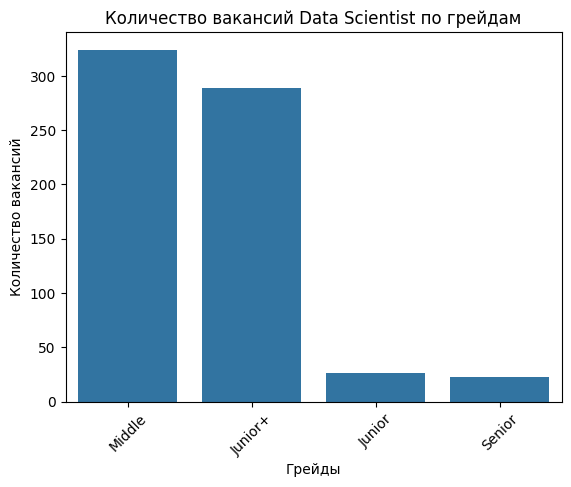

In [19]:
sns.barplot(x='experience', y='total', data=dst_gr)
plt.xticks(rotation=45)
plt.xlabel('Грейды')
plt.ylabel('Количество вакансий')
plt.title('Количество вакансий Data Scientist по грейдам')
plt.show()

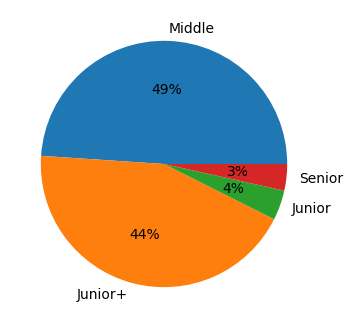

In [20]:
plt.figure(figsize=(6, 4))
plt.pie(dst_gr['total'], labels=dst_gr['experience'], autopct='%.0f%%')
plt.show()

Почти половина вакансий Data Scientist относится к грейду Middle - 49%, чуть меньше - 44% к Junior+ .

<a id="2"></a>
### Количество и доля вакансий Data Analyst по грейдам

In [21]:
dan_gr = dan.groupby('experience', as_index=False)[['id']].count()
dan_gr = dan_gr.rename(columns={'id':'total'}).sort_values(by='total', ascending=False)
dan_gr

,experience,total
1,Junior+,178
2,Middle,120
0,Junior,9
3,Senior,3


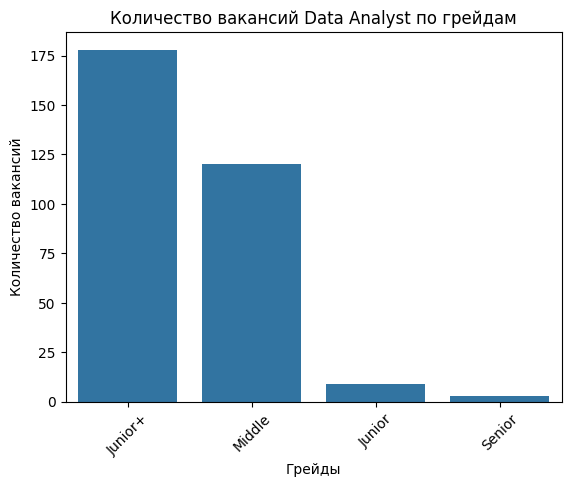

In [22]:
sns.barplot(x='experience', y='total', data=dan_gr)
plt.xticks(rotation=45)
plt.xlabel('Грейды')
plt.ylabel('Количество вакансий')
plt.title('Количество вакансий Data Analyst по грейдам')
plt.show()

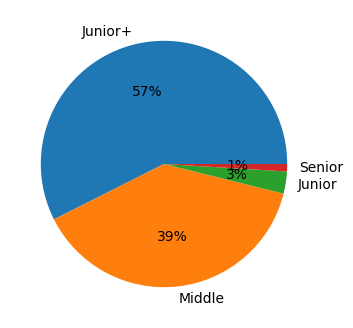

In [23]:
plt.figure(figsize=(6, 4))
plt.pie(dan_gr['total'], labels=dan_gr['experience'], autopct='%.0f%%')
plt.show()

Большая часть вакансий Data Analyst относится к Junior+, это 57%. Middle - 39%, доля Junior и Senior очень мала.

<a id="3"></a>
### Ожидаемые hard skills для Data Scientist

Для дальнейших исследований выделим данные для каждого грейда

In [24]:
dst_junior_plus = dst.query('experience_1 == "Junior+ (1-3 years)"')

In [25]:
dst_junior = dst.query('experience_1 == "Junior (no experince)"')

In [26]:
dst_middle = dst.query('experience_1 == "Middle (3-6 years)"')

In [27]:
dst_senior = dst.query('experience_1 == "Senior (6+ years)"')

In [28]:
dan_junior_plus = dan.query('experience_1 == "Junior+ (1-3 years)"')

In [29]:
dan_junior = dan.query('experience_1 == "Junior (no experince)"')

In [30]:
dan_middle = dan.query('experience_1 == "Middle (3-6 years)"')

In [31]:
dan_senior = dan.query('experience_1 == "Senior (6+ years)"')

In [32]:
dst['hard_skills_from_description'].unique()

array([nan, 'Юнит-экономика', 'confluence', 'Pandas',
       'Pandas, confluence', 'Pandas, Юнит-экономика',
       'confluence, Юнит-экономика', 'Pandas, confluence, Юнит-экономика'],
      dtype=object)

In [33]:
dst_soft = dst['soft_skills_from_description'].unique()
dst_soft

array([nan, 'Презентация результатов',
       'Коммуникация, Документация, Креативность', 'Документация',
       'Документация, Креативность', 'Коммуникация', 'Проактивность',
       'Коммуникация, Документация', 'Креативность',
       'Аналитическое мышление', 'Коммуникация, Презентация результатов',
       'Коммуникация, Аналитическое мышление', 'Принятие решений',
       'Коммуникация, Документация, Презентация результатов',
       'Коммуникация, Документация, Презентация результатов, Принятие решений',
       'Документация, Аналитическое мышление',
       'Коммуникация, Письменная коммуникация, Документация, Презентация результатов',
       'Адаптивность',
       'Коммуникация, Документация, Аналитическое мышление',
       'Работа в команде, Лидерство, Адаптивность, Принятие решений, Внимание к деталям'],
      dtype=object)

Hard skills  в столбце hard_skills_from_description описаны малоинформативно, удобно брать данные о них из key_skills_from_key_skills_field.
Soft skills возьмем из soft_skills_from_description.

In [34]:
dst_junior_plus_skill = dst_junior_plus['key_skills_from_key_skills_field'].str.lower().unique()
dst_junior_plus_skill_1 = " ".join(map(str,dst_junior_plus_skill))
dst_junior_plus_skill_1

'information technology, fluent english, research, public speaking, machine learning, data mining, writing articles python, sql, математическое моделирование, математический анализ, r python, hadoop, spark, ml, dl python, базы данных, sql, keras, tensorflow, sklearn, numpy, pandas, pytorch kaldi, pytorch, tensorflow, librosa, ffmpeg, soxi python, ml, ci\\cd, субд, linux математическое моделирование, анализ данных, статистический анализ, валидация моделей, модельный риск, sql python, sql, pytorch, математическая статистика, keras python, sql, postgresql, анализ данных, oracle, git nan математическое моделирование, анализ данных, статистический анализ, валидация моделей, модельный риск, sql, python sql, etl, power bi, yandex cloud platform python, sql, oracle pl/sql, big data, ml, машинное обучение оценка рисков, статистический анализ, управление рисками, математическое моделирование, pd, lgd, ead, sql, портфельные риски, кредитные риски python, sql, api sql, git, python, анализ данных, 

In [35]:
dst_junior_plus_skill_2 = pd.Series(dst_junior_plus_skill_1.split(','))
##dst_junior_plus_skill_2.value_counts()[:30]

Мы видим дубликаты в полученном перечне, но правильно заменить их достаточно трудоемко и может быть неоднозначно.
Заменим те слова, которые относятся к машинному обучению и анализу данных.

In [36]:
dst_junior_plus_skill_2 = dst_junior_plus_skill_2.replace({'machine learning','ml'},'машинное обучение',regex=True)
dst_junior_plus_skill_2 = dst_junior_plus_skill_2.replace('data analysis','анализ данных',regex=True)
dst_junior_plus_skill_2.value_counts()[:30]

машинное обучение               55
sql                             50
python                          31
анализ данных                   22
pandas                          16
математическая статистика       16
pytorch                         14
big data                        14
data science                    12
статистический анализ           11
nlp                             11
numpy                           10
математическое моделирование     9
tensorflow                       8
английский язык                  7
spark                            7
аналитическое мышление           7
git                              7
postgresql                       6
linux                            6
sklearn                          6
data mining                      5
работа с базами данных           5
математический анализ            5
hadoop                           4
computer vision                  4
pyspark                          4
sql python                       4
scipy               

In [37]:
dst_junior_plus_hard = dst_junior_plus_skill_2.value_counts()[:11]
dst_junior_plus_hard

машинное обучение            55
sql                          50
python                       31
анализ данных                22
pandas                       16
математическая статистика    16
pytorch                      14
big data                     14
data science                 12
статистический анализ        11
nlp                          11
Name: count, dtype: int64

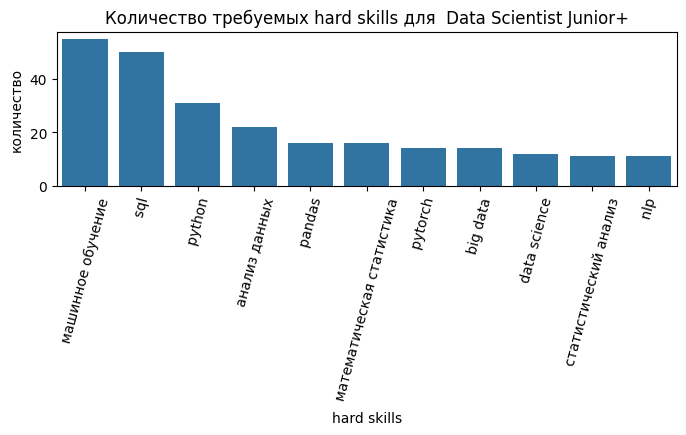

In [38]:
plt.figure(figsize=(8, 2))
sns.barplot(data=dst_junior_plus_hard)
plt.xticks(rotation=75)
plt.xlabel('hard skills')
plt.ylabel('количество')
plt.title('Количество требуемых hard skills для  Data Scientist Junior+')
plt.show()

Из всех skills наиболее востребованы машинное обучение и sql.

In [39]:
dst_junior_skill = dst_junior['key_skills_from_key_skills_field'].str.lower().unique()
dst_junior_skill_1 = " ".join(map(str,dst_junior_skill))
dst_junior_skill_1

'information technology, fluent english, research, public speaking, machine learning, data mining, writing articles python, sql nan python, data mining, git, английский язык, data analysis, анализ данных, аналитическое мышление python, it, разработка поисковых технологий, ds, ml python, математическая статистика, machine learning python, математическая статистика, big data, machine learning, spark, ml python, математическая статистика, обучение и развитие, статистический анализ, прогнозирование, математический анализ анализ данных, big data'

In [40]:
dst_junior_skill_2 = pd.Series(dst_junior_skill_1.split(','))
dst_junior_skill_2.value_counts()

 математическая статистика              3
 machine learning                       2
 data mining                            2
 big data                               2
 ml python                              2
information technology                  1
 разработка поисковых технологий        1
 прогнозирование                        1
 статистический анализ                  1
 обучение и развитие                    1
 spark                                  1
 machine learning python                1
 ds                                     1
 аналитическое мышление python          1
 it                                     1
 fluent english                         1
 анализ данных                          1
 data analysis                          1
 английский язык                        1
 git                                    1
 sql nan python                         1
 writing articles python                1
 public speaking                        1
 research                         

In [41]:
dst_junior_skill_2 = dst_junior_skill_2.replace({'machine learning','машинное обучение python'},'машинное обучение',regex=True)
dst_junior_skill_2 = dst_junior_skill_2.replace({'writing articles python','аналитическое мышление python'},'python',regex=True)
dst_junior_skill_2 = dst_junior_skill_2.replace({'data analysis','математический анализ анализ данных'},'анализ данных',regex=True)
dst_junior_skill_2.value_counts()

 анализ данных                      3
 математическая статистика          3
 машинное обучение                  2
 data mining                        2
 python                             2
 big data                           2
 ml python                          2
information technology              1
 ds                                 1
 статистический анализ              1
 обучение и развитие                1
 spark                              1
 машинное обучение python           1
 it                                 1
 разработка поисковых технологий    1
 fluent english                     1
 английский язык                    1
 git                                1
 sql nan python                     1
 public speaking                    1
 research                           1
 прогнозирование                    1
Name: count, dtype: int64

In [42]:
dst_junior_hard = dst_junior_skill_2.value_counts()[:6]

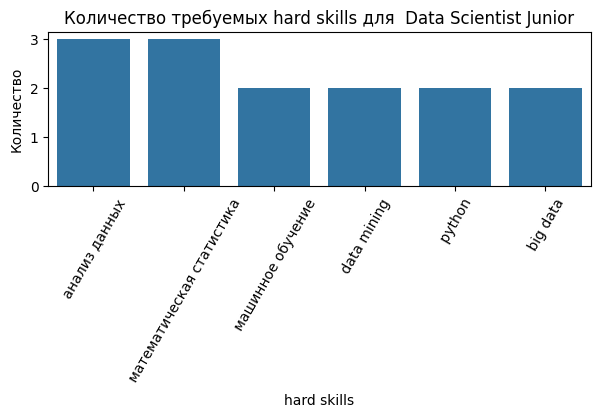

In [43]:
plt.figure(figsize=(7, 2))
sns.barplot(data=dst_junior_hard)
plt.xticks(rotation=60)
plt.xlabel('hard skills')
plt.ylabel('Количество')
plt.title('Количество требуемых hard skills для  Data Scientist Junior')
plt.show()

Данных для Data Scientist Junior мало, поэтому на диаграмме представлены навыки, перечисленные более одного раза.

In [44]:
dst_middle_skill = dst_middle['key_skills_from_key_skills_field'].str.lower().unique()
dst_middle_skill_1 = " ".join(map(str,dst_middle_skill))
dst_middle_skill_1

'python, data science, разработка поисковых технологий, it оценка рисков, ms powerpoint, статистический анализ, управление рисками, математическое моделирование, pd, lgd, ead, sql, портфельные риски, кредитные риски information technology, fluent english, research, public speaking, machine learning, data mining, writing articles python, sql, spark, базы данных, php, clickhouse, elastic search, mysql, scala, typescript sql, python, математическое моделирование, big data, ml nan sql, python, pandas, ml, machine learning, обучение модели, машинное обучение, nlp, cv, computer vision, нейронная сеть python, sql, hadoop, pandas, spark machine learning, ml, data science, ds, машинное обучение, cv, computer vision, mle, deep learning, dl, generative design, gd, генеративный дизайн it, поиск, python, ml, hadoop, spark, yarn, hive, hdfs, mlflow, разработка поисковых технологий python, sql, математическая статистика, hadoop, математическое моделирование, spark, ml python, pytorch, tensorflow, ml,

In [45]:
dst_middle_skill_2 = pd.Series(dst_middle_skill_1.split(','))
dst_middle_skill_2.value_counts()[:30]

sql                             41
python                          38
machine learning                34
ml                              22
data science                    21
pandas                          20
pytorch                         19
математическая статистика       15
numpy                           14
big data                        13
hadoop                          13
spark                           12
docker                          12
анализ данных                   11
nlp                             11
git                             10
deep learning                    9
hive                             8
математическое моделирование     8
data analysis                    8
машинное обучение                8
mlflow                           8
sql python                       7
airflow                          7
linux                            7
postgresql                       6
computer vision                  6
linux python                     5
tensorflow          

In [46]:
dst_middle_skill_2 = dst_middle_skill_2.replace({'machine learning','ml'},'машинное обучение',regex=True)
dst_middle_skill_2 = dst_middle_skill_2.replace('data analysis','анализ данных',regex=True)
dst_middle_skill_2.value_counts()[:30]

машинное обучение               64
sql                             41
python                          38
data science                    21
pandas                          20
pytorch                         19
анализ данных                   19
математическая статистика       15
numpy                           14
hadoop                          13
big data                        13
docker                          12
spark                           12
nlp                             11
git                             10
deep learning                    9
математическое моделирование     8
hive                             8
машинное обучениеflow            8
linux                            7
sql python                       7
машинное обучение python         7
airflow                          7
postgresql                       6
computer vision                  6
linux python                     5
tensorflow                       5
аналитическое мышление           5
статистический анали

In [47]:
dst_middle_hard = dst_middle_skill_2.value_counts()[:15]

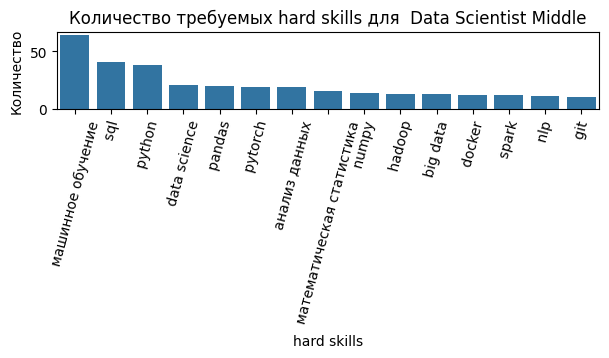

In [48]:
plt.figure(figsize=(7, 1))
sns.barplot(data=dst_middle_hard)
plt.xticks(rotation=75)
plt.xlabel('hard skills')
plt.ylabel('Количество')
plt.title('Количество требуемых hard skills для  Data Scientist Middle')
plt.show()

От Data Scientist Middle требуются чвще всего машинное обучение, sql, python.

In [49]:
dst_senior_skill = dst_senior['key_skills_from_key_skills_field'].str.lower().unique()
dst_senior_skill_1 = " ".join(map(str,dst_senior_skill))
dst_senior_skill_1

'python, machine learning, pytorch, машинное обучение, linux opencv, data science, ocr nan python, английский язык, linux, публичные выступления, c++ python, machine learning, английский язык, data analysis, математический анализ, аналитическое мышление, анализ данных, tensorflow, pytorch, scikit-learn, gitlab, ci/cd python, data analysis, английский язык, анализ данных, tensorflow, pytorch, scikit-learn sql, анализ данных, a/b тесты, ltv prediction, recsys, ulift modeling, churn prediction data science, python, it, экономика, операционная эффективность sql, python, ml, hadoop, spark, hive управление командой, python, sql, ml opencv, tensorflow, pytorch python, deep learning, алгоритмы и структуры данных, pandas, scikit-learn, keras, ml управление рисками, управление командой ml, mlp, lstm, attention mechanism, ии, python, искусственный интеллект, data scientist, catboost, xgboost, lightgbm, scikit-learn, arima, random forest, decision tree, linear regression, principal component analy

In [50]:
dst_senior_skill_2 = pd.Series(dst_senior_skill_1.split(','))
dst_senior_skill_2.value_counts()[:30]

 python                          5
 pandas                          3
 pytorch                         3
 scikit-learn                    3
 tensorflow                      3
 анализ данных                   3
 machine learning                3
 английский язык                 3
 data analysis                   2
 spark                           2
 hadoop                          2
 ml                              2
 data science                    2
 машинное обучение               2
 random forest                   1
 linear regression               1
 principal component analysis    1
 decision tree                   1
python                           1
 arima                           1
 plotly                          1
 xgboost                         1
 catboost                        1
 data scientist                  1
 искусственный интеллект         1
 lightgbm                        1
 gru big data                    1
 numpy                           1
 kubernetes         

In [51]:
dst_senior_skill_2 = dst_senior_skill_2.replace({'machine learning','ml'},'машинное обучение',regex=True)
dst_senior_skill_2 = dst_senior_skill_2.replace('data analysis','анализ данных',regex=True)
dst_senior_skill_2 = dst_senior_skill_2.replace('data scientist','data science',regex=True)
dst_senior_skill_2.value_counts()[:30]

машинное обучение                 7
анализ данных                     5
python                            5
pandas                            3
pytorch                           3
data science                      3
английский язык                   3
tensorflow                        3
scikit-learn                      3
hadoop                            2
spark                             2
decision tree                     1
plotly                            1
principal component analysis      1
linear regression                 1
lightgbm                          1
random forest                     1
arima                             1
xgboost                           1
catboost                          1
искусственный интеллект           1
ии                                1
numpy                             1
gru big data                      1
statsmodels                       1
matplotlib                        1
lstm                              1
высокие коммуникативные навы

In [52]:
dst_senior_hard = dst_senior_skill_2.value_counts()[:11]

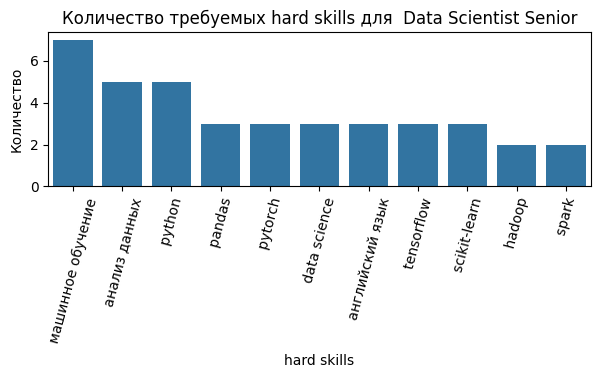

In [53]:
plt.figure(figsize=(7, 2))
sns.barplot(data=dst_senior_hard)
plt.xticks(rotation=75)
plt.xlabel('hard skills')
plt.ylabel('Количество')
plt.title('Количество требуемых hard skills для  Data Scientist Senior')
plt.show()

Вакансий Data Scientist Senior в наших данных 23, для этого количества представлены skills. Наиболее востребованы машинное обучение, анализ данных, python.

<a id="4"></a>
### Ожидаемые hard skills для Data Analyst

In [54]:
dan_junior_plus_skill = dan_junior_plus['key_skills_from_key_skills_field'].str.lower().unique()
dan_junior_plus_skill_1 = " ".join(map(str,dan_junior_plus_skill))
dan_junior_plus_skill_1

'sql, математическая статистика, linux, clickhouse, bi, http, git, python, поиск аномалий, анализ временных рядов sql, dwh, teradata, hadoop, airflow, greenplum, витрины данных, informatica sql, dwh, teradata, hadoop, airflow, greenplum, витрины данных sql, python, power bi, powerbi, dax, ms power bi, bigquery, tableau, postgresql, oracle, ms sql server sql, аналитика, python, анализ данных, работа с большим объемом информации, tableau, яндекс.метрика, power bi, clickhouse, google analytics sql, ms sql, анализ рисков, риск-менеджмент, оценка рисков, математическая статистика, sas, bi, портфельные риски, кредитные риски, сбор и анализ информации, аналитика, математический анализ, анализ данных, python, анти фрод, anti-fraud ms excel, финансовый анализ, sql, работа в команде, анализ данных, google docs, аналитика, google таблицы, работа в условиях многозадачности, работа с большим объемом информации, грамотная речь и письмо, gexcel, продвинутый пользователь пк, аналитическое мышление sql

In [55]:
dan_junior_plus_skill_2 = pd.Series(dan_junior_plus_skill_1.split(','))
dan_junior_plus_skill_2.value_counts()[:30]

python                                 40
sql                                    31
анализ данных                          29
data analysis                          18
аналитическое мышление                 16
аналитика                              15
power bi                               14
работа с базами данных                 12
математическая статистика              12
big data                               11
аналитические исследования             11
tableau                                10
работа с большим объемом информации     9
clickhouse                              7
postgresql                              7
powerbi                                 6
базы данных                             6
a/b тесты                               6
airflow                                 6
ms excel                                6
сбор и анализ информации                5
ms sql                                  5
etl                                     4
анализ бизнес показателей         

In [56]:
dan_junior_plus_skill_2 = dan_junior_plus_skill_2.replace({'data analysis','аналитика','аналитические исследования'},'анализ данных',regex=True)
dan_junior_plus_skill_2 = dan_junior_plus_skill_2.replace('работа с базами данных','базы данных',regex=True)
dan_junior_plus_skill_2 = dan_junior_plus_skill_2.replace('powerbi','power bi',regex=True)
dan_junior_plus_skill_2 = dan_junior_plus_skill_2.replace('работа с большим объемом информации','big data',regex=True)
dan_junior_plus_skill_2.value_counts()[:30]

анализ данных                   73
python                          40
sql                             31
power bi                        20
big data                        20
базы данных                     18
аналитическое мышление          16
математическая статистика       12
tableau                         10
clickhouse                       7
postgresql                       7
ms excel                         6
airflow                          6
a/b тесты                        6
сбор и анализ информации         5
ms sql                           5
анализ данных sql                5
статистический анализ            4
pandas                           4
прогнозирование                  4
анализ бизнес показателей        4
oracle                           4
математический анализ            4
google analytics                 4
git                              4
etl                              4
hadoop                           4
визуализация данных              3
математическое модел

In [57]:
dan_junior_plus_hard = dan_junior_plus_skill_2.value_counts()[:10]
##dst_junior_plus_hard

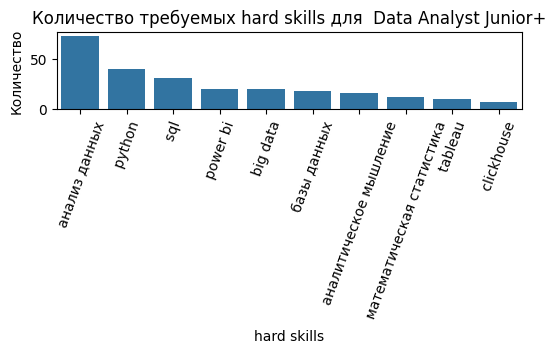

In [58]:
plt.figure(figsize=(6, 1))
sns.barplot(data=dan_junior_plus_hard)
plt.xticks(rotation=70)
plt.xlabel('hard skills')
plt.ylabel('Количество')
plt.title('Количество требуемых hard skills для  Data Analyst Junior+')
plt.show()

Самым важным из hard skills для  Data Analyst Junior+ оказался анализ данных, он упоминается почти в 2 раза чаще, чем следующие за ним python, sql.

In [59]:
dan_junior_skill = dan_junior['key_skills_from_key_skills_field'].str.lower().unique()
dan_junior_skill_1 = " ".join(map(str,dan_junior_skill))
dan_junior_skill_1

'nan python, sql, power bi, airflow, metabase, финансовая аналитика, аналитика python, sql, pandas, numpy, powerbi, apache airflow, sklearn, junior sql, python, grafana, ms excel big data, data analysis, python, математическое моделирование, структуры данных, анализ данных, data science, sql'

In [60]:
dan_junior_skill_2 = pd.Series(dan_junior_skill_1.split(','))
dan_junior_skill_2.value_counts()

 sql                             3
 python                          2
nan python                       1
 sklearn                         1
 анализ данных                   1
 структуры данных                1
 математическое моделирование    1
 data analysis                   1
 ms excel big data               1
 grafana                         1
 junior sql                      1
 apache airflow                  1
 powerbi                         1
 numpy                           1
 pandas                          1
 аналитика python                1
 финансовая аналитика            1
 metabase                        1
 airflow                         1
 power bi                        1
 data science                    1
Name: count, dtype: int64

In [61]:
dan_junior_skill_2 = dan_junior_skill_2.replace({'nan python','аналитика python'},'python',regex=True)
dan_junior_skill_2 = dan_junior_skill_2.replace('data analysis','анализ данных',regex=True)
dan_junior_skill_2.value_counts()

 python                          3
 sql                             3
 анализ данных                   2
python                           1
 sklearn                         1
 структуры данных                1
 математическое моделирование    1
 ms excel big data               1
 grafana                         1
 junior sql                      1
 powerbi                         1
 apache airflow                  1
 numpy                           1
 pandas                          1
 финансовая аналитика            1
 metabase                        1
 airflow                         1
 power bi                        1
 data science                    1
Name: count, dtype: int64

In [62]:
dan_junior_hard = dan_junior_skill_2.value_counts()[:3]

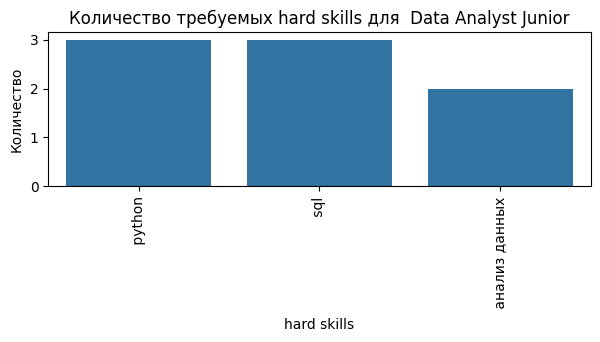

In [63]:
plt.figure(figsize=(7, 2))
sns.barplot(data=dan_junior_hard)
plt.xticks(rotation=90)
plt.xlabel('hard skills')
plt.ylabel('Количество')
plt.title('Количество требуемых hard skills для  Data Analyst Junior')
plt.show()

Данных hard skills для  Data Analyst Junior мало, показаны те, которые упоминаются более одного раза.

In [64]:
dan_middle_skill = dan_middle['key_skills_from_key_skills_field'].str.lower().unique()
dan_middle_skill_1 = " ".join(map(str,dan_middle_skill))
dan_middle_skill_1

'анализ данных python, sql, a/b тесты nan sql, data analysis, python, big data, spark python, sql, антифрод, a/b тесты, power bi, tableau python, статистический анализ, прогнозирование, математическая статистика, sql, ms excel, pandas, numpy python, java, анализ данных, data analysis, управление командой python, sql, ms excel, power bi sql, python, a/b тесты python, clickhouse, postgresql, git sql, python, английский язык, математическая статистика, tableau аналитическое мышление, бизнес-анализ, аналитика, power bi, sql, лидерство, автоматизация процессов, управленческая отчетность, деловая коммуникация, анализ бизнес показателей, стратегическое мышление, работа с большим объемом информации, прогнозирование, планирование, организаторские навыки, оптимизация бизнес-процессов, подготовка отчетов, расстановка приоритетов, корпоративная этика python, sql, data analysis, анализ данных sql, python, pandas, анализ данных, ad hoc analysis sql, английский язык, postgresql, a/b тесты, data analy

In [65]:
dan_middle_skill_2 = pd.Series(dan_middle_skill_1.split(','))
dan_middle_skill_2.value_counts()[:30]

python                                 29
sql                                    20
data analysis                          14
анализ данных                          13
big data                                9
postgresql                              8
power bi                                7
аналитика                               5
аналитическое мышление                  4
pandas                                  4
tableau                                 4
базы данных                             4
a/b тесты                               4
работа с базами данных                  3
ms sql                                  3
data analysis sql                       3
greenplum                               3
spark                                   3
математическая статистика               3
английский язык                         2
базы данных sql                         2
airflow                                 2
ms power bi                             2
работа с большим объемом информаци

In [66]:
dan_middle_skill_2 = dan_middle_skill_2.replace('работа с базами данных','базы данных',regex=True)
dan_middle_skill_2 = dan_middle_skill_2.replace({'data analysis','аналитика'},'анализ данных',regex=True)
dan_middle_skill_2.value_counts()[:15]

анализ данных             32
python                    29
sql                       20
big data                   9
postgresql                 8
базы данных                7
power bi                   7
tableau                    4
pandas                     4
анализ данных sql          4
a/b тесты                  4
аналитическое мышление     4
greenplum                  3
ms sql                     3
spark                      3
Name: count, dtype: int64

In [67]:
dan_middle_hard = dan_middle_skill_2.value_counts()[:7]

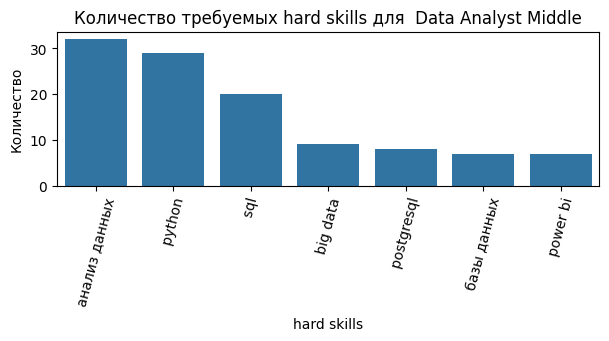

In [68]:
plt.figure(figsize=(7, 2))
sns.barplot(data=dan_middle_hard)
plt.xticks(rotation=75)
plt.xlabel('hard skills')
plt.ylabel('Количество')
plt.title('Количество требуемых hard skills для  Data Analyst Middle')
plt.show()

Важнейшими hard skills для  Data Analyst Middle являются анализ данных, python и sql.

In [69]:
dan_senior_skill = dan_senior['key_skills_from_key_skills_field'].str.lower().unique()
dan_senior_skill_1 = " ".join(map(str,dan_senior_skill))
dan_senior_skill_1

'python, sql, a/b тесты sql, python sql, python, английский язык, data analysis, tableau, аналитические исследования, бизнес-анализ, статистический анализ, power bi, data warehousing, eda, анализ рынка, прогнозирование, статистика, analysis'

In [70]:
dan_senior_skill_2 = pd.Series(dan_senior_skill_1.split(','))
dan_senior_skill_2.value_counts()

python                         1
 sql                           1
 статистика                    1
 прогнозирование               1
 анализ рынка                  1
 eda                           1
 data warehousing              1
 power bi                      1
 статистический анализ         1
 бизнес-анализ                 1
 аналитические исследования    1
 tableau                       1
 data analysis                 1
 английский язык               1
 python                        1
 python sql                    1
 a/b тесты sql                 1
 analysis                      1
Name: count, dtype: int64

In [71]:
dan_senior_skill_2 = dan_senior_skill_2.replace({'data analysis','analysis','аналитические исследования'},'анализ данных',regex=True)
dan_senior_skill_2.value_counts()

 анализ данных            2
 бизнес-анализ            1
 прогнозирование          1
 анализ рынка             1
 eda                      1
 data warehousing         1
 power bi                 1
 статистический анализ    1
python                    1
 sql                      1
 tableau                  1
 data анализ данных       1
 английский язык          1
 python                   1
 python sql               1
 a/b тесты sql            1
 статистика               1
Name: count, dtype: int64

Данных для Data Analyst Senior мало. Присутствуют анализ данных, python, sql.

<a id="5"></a>
### Ожидаемые soft skills для Data Scientist

In [72]:
dst_s1 = dst['soft_skills_from_description'].unique()

In [73]:
dst_s_1 = ", ".join(map(str,dst_s1))
dst_s2 = pd.Series(dst_s_1.split(','))

In [74]:
dst_soft = dst_s2.value_counts()
dst_soft

 Коммуникация               9
 Документация               9
 Презентация результатов    5
 Аналитическое мышление     4
 Креативность               3
 Принятие решений           3
 Адаптивность               2
nan                         1
 Проактивность              1
 Письменная коммуникация    1
 Работа в команде           1
 Лидерство                  1
 Внимание к деталям         1
Name: count, dtype: int64

In [75]:
dst_junior_plus['soft_skills_from_description'].unique()

array(['Презентация результатов',
       'Коммуникация, Документация, Креативность',
       'Документация, Креативность', nan, 'Документация', 'Коммуникация',
       'Коммуникация, Документация', 'Аналитическое мышление',
       'Проактивность', 'Принятие решений',
       'Документация, Аналитическое мышление', 'Креативность',
       'Коммуникация, Документация, Аналитическое мышление'], dtype=object)

In [76]:
dst_junior_plus_s1 = dst_junior_plus['soft_skills_from_description'].unique()

In [77]:
dst_junior_plus_s_1 = ", ".join(map(str,dst_junior_plus_s1))
dst_junior_plus_s2 = pd.Series(dst_junior_plus_s_1.split(','))
dst_junior_plus_s2

0     Презентация результатов
1                Коммуникация
2                Документация
3                Креативность
4                Документация
5                Креативность
6                         nan
7                Документация
8                Коммуникация
9                Коммуникация
10               Документация
11     Аналитическое мышление
12              Проактивность
13           Принятие решений
14               Документация
15     Аналитическое мышление
16               Креативность
17               Коммуникация
18               Документация
19     Аналитическое мышление
dtype: object

In [78]:
dst_junior_plus_s2.value_counts()

 Документация              6
 Коммуникация              4
 Креативность              3
 Аналитическое мышление    3
Презентация результатов    1
 nan                       1
 Проактивность             1
 Принятие решений          1
Name: count, dtype: int64

Указанных soft skills для Data Scientist мало, но они не разнообразны и можно сказать, какие востребованы больше всего.

In [79]:
dst_junior_plus_soft = dst_junior_plus_s2.value_counts()[:4]

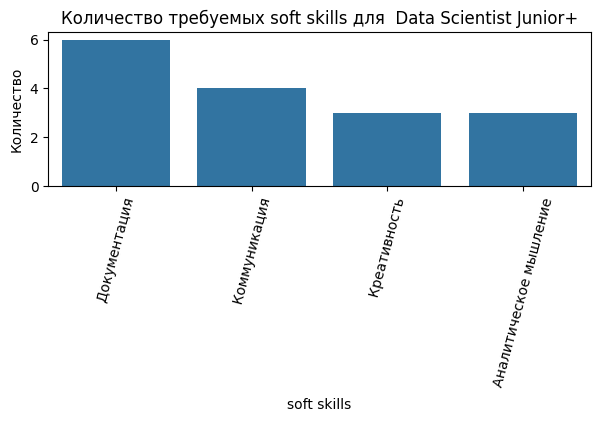

In [80]:
plt.figure(figsize=(7, 2))
sns.barplot(data=dst_junior_plus_soft)
plt.xticks(rotation=75)
plt.xlabel('soft skills')
plt.ylabel('Количество')
plt.title('Количество требуемых soft skills для  Data Scientist Junior+')
plt.show()

Чаще всего от Data Scientist Junior+требуются навыки работы с документацией, а также коммуникативность и креативность

In [81]:
dst_junior_s1 = dst_junior['soft_skills_from_description'].unique()

In [82]:
dst_junior_s_1 = ", ".join(map(str,dst_junior_s1))
dst_junior_s2 = pd.Series(dst_junior_s_1.split(','))
dst_junior_s2

0    Презентация результатов
1                        nan
2               Документация
3     Аналитическое мышление
4               Документация
5     Аналитическое мышление
dtype: object

In [83]:
dst_junior_soft = dst_junior_s2.value_counts()
dst_junior_soft

 Документация              2
 Аналитическое мышление    2
Презентация результатов    1
 nan                       1
Name: count, dtype: int64

Для Scientist Junior данных мало, но видно, что присутствует работа с документацией.

In [84]:
dst_middle_s1 = dst_middle['soft_skills_from_description'].unique()

In [85]:
dst_middle_s_1 = ", ".join(map(str,dst_middle_s1))
dst_middle_s2 = pd.Series(dst_middle_s_1.split(','))
dst_middle_s2

0                          nan
1                 Документация
2                 Коммуникация
3                Проактивность
4                 Коммуникация
5                 Документация
6                 Креативность
7       Аналитическое мышление
8                 Коммуникация
9                 Документация
10                Креативность
11                Коммуникация
12     Презентация результатов
13                Коммуникация
14      Аналитическое мышление
15                Документация
16      Аналитическое мышление
17                Коммуникация
18     Письменная коммуникация
19                Документация
20     Презентация результатов
21            Работа в команде
22                   Лидерство
23                Адаптивность
24            Принятие решений
25          Внимание к деталям
dtype: object

In [86]:
dst_middle_soft = dst_middle_s2.value_counts()[:5]
dst_middle_soft

Коммуникация               6
Документация               5
Аналитическое мышление     3
Креативность               2
Презентация результатов    2
Name: count, dtype: int64

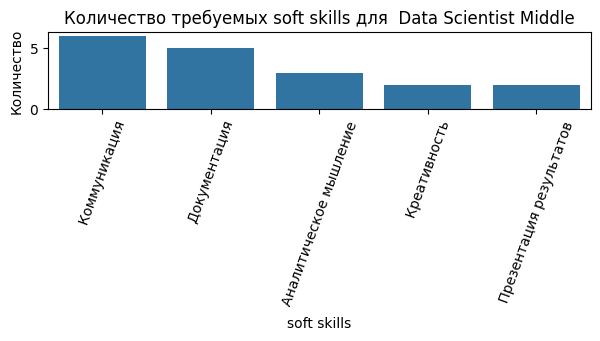

In [87]:
plt.figure(figsize=(7, 1))
sns.barplot(data=dst_middle_soft)
plt.xticks(rotation=70)
plt.xlabel('soft skills')
plt.ylabel('Количество')
plt.title('Количество требуемых soft skills для  Data Scientist Middle')
plt.show()

Ожидаемые навыки Data Scientist Middle - коммуникативность и работа с документацией

In [88]:
dst_senior_s1 = dst_senior['soft_skills_from_description'].unique()

In [89]:
dst_senior_s_1 = ", ".join(map(str,dst_senior_s1))
dst_senior_s2 = pd.Series(dst_senior_s_1.split(','))
dst_senior_s2

0                          nan
1                 Коммуникация
2                 Документация
3      Презентация результатов
4                 Коммуникация
5                 Документация
6      Презентация результатов
7             Принятие решений
8                 Документация
9                 Адаптивность
10                Коммуникация
dtype: object

In [90]:
dst_senior_soft = dst_senior_s2.value_counts()
dst_senior_soft

 Коммуникация               3
 Документация               3
 Презентация результатов    2
nan                         1
 Принятие решений           1
 Адаптивность               1
Name: count, dtype: int64

Коммуникация, документация чаще всего необходимы для  Data Scientist Senior

<a id="6"></a>
### Ожидаемые soft skills для Data Analyst

In [91]:
dan_s1 = dan['soft_skills_from_description'].unique()

In [92]:
dan_s_1 = ", ".join(map(str,dan_s1))
dan_s2 = pd.Series(dan_s_1.split(','))

In [93]:
dan_soft = dan_s2.value_counts()
dan_soft

 Коммуникация               8
 Документация               6
 Аналитическое мышление     3
 Решение проблем            3
 Проактивность              3
 Принятие решений           2
 Переговоры                 2
nan                         1
 Креативность               1
 Критическое мышление       1
 Презентация результатов    1
 Внимание к деталям         1
Name: count, dtype: int64

In [94]:
dan_junior_plus_s1 = dan_junior_plus['soft_skills_from_description'].unique()

In [95]:
dan_junior_plus_s_1 = ", ".join(map(str,dan_junior_plus_s1))
dan_junior_plus_s2 = pd.Series(dan_junior_plus_s_1.split(','))
dan_junior_plus_s2

0                         nan
1                Документация
2      Аналитическое мышление
3                Документация
4                  Переговоры
5                Коммуникация
6                Коммуникация
7                Документация
8                Креативность
9            Принятие решений
10               Коммуникация
11               Документация
12              Проактивность
13               Коммуникация
14            Решение проблем
15               Коммуникация
16               Документация
17     Аналитическое мышление
18              Проактивность
19     Аналитическое мышление
dtype: object

In [96]:
dan_junior_plus_s2.value_counts()

 Документация              5
 Коммуникация              5
 Аналитическое мышление    3
 Проактивность             2
nan                        1
 Переговоры                1
 Креативность              1
 Принятие решений          1
 Решение проблем           1
Name: count, dtype: int64

In [97]:
dan_junior_plus_soft = dan_junior_plus_s2.value_counts()[:4]

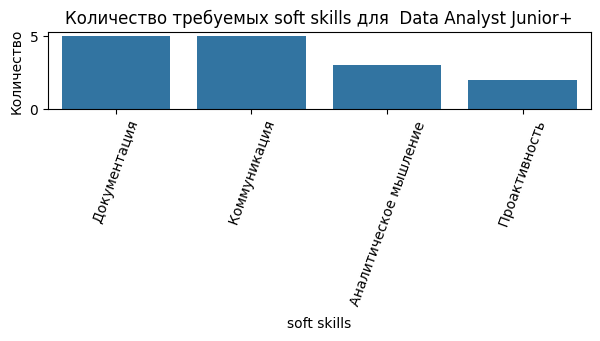

In [98]:
plt.figure(figsize=(7, 1))
sns.barplot(data=dan_junior_plus_soft)
plt.xticks(rotation=70)
plt.xlabel('soft skills')
plt.ylabel('Количество')
plt.title('Количество требуемых soft skills для  Data Analyst Junior+')
plt.show()

In [99]:
dan_junior_s1 = dan_junior['soft_skills_from_description'].unique()

Ожидаемые soft skills для Data Analyst Junior+ : работа с документацией, коммуникативность - самые востребованные.

In [100]:
dan_junior_s_1 = ", ".join(map(str,dan_junior_s1))
dan_junior_s2 = pd.Series(dan_junior_s_1.split(','))
dan_junior_s2

0                        nan
1     Аналитическое мышление
2               Коммуникация
dtype: object

Данных soft skills для Data Analyst Junior мало

In [101]:
dan_middle_s1 = dan_middle['soft_skills_from_description'].unique()

In [102]:
dan_middle_s_1 = ", ".join(map(str,dan_middle_s1))
dan_middle_s2 = pd.Series(dan_middle_s_1.split(','))
dan_middle_s2

0                         nan
1             Решение проблем
2            Принятие решений
3                Коммуникация
4                Документация
5                Коммуникация
6                Документация
7                  Переговоры
8               Проактивность
9                Коммуникация
10               Документация
11              Проактивность
12     Аналитическое мышление
13               Коммуникация
14       Критическое мышление
dtype: object

In [103]:
dan_middle_s2.value_counts()

 Коммуникация              4
 Документация              3
 Проактивность             2
nan                        1
 Решение проблем           1
 Принятие решений          1
 Переговоры                1
 Аналитическое мышление    1
 Критическое мышление      1
Name: count, dtype: int64

In [104]:
dan_middle_soft = dan_middle_s2.value_counts()[:3]

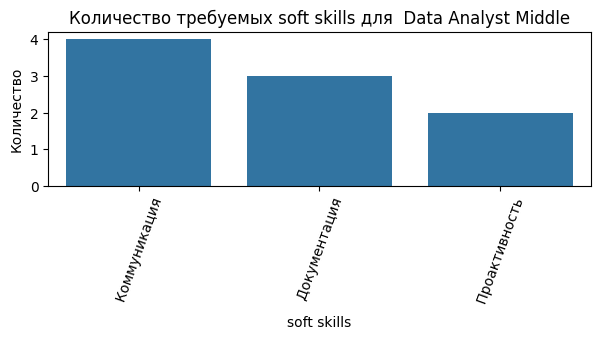

In [105]:
plt.figure(figsize=(7, 2))
sns.barplot(data=dan_middle_soft)
plt.xticks(rotation=70)
plt.xlabel('soft skills')
plt.ylabel('Количество')
plt.title('Количество требуемых soft skills для  Data Analyst Middle')
plt.show()

soft skills для  Data Analyst Middle - на пкрвом месте коммуникативносьт, присутствуют работа с документацией и проактивность.

In [106]:
dan_senior_s1 = dan_senior['soft_skills_from_description'].unique()

In [107]:
dan_senior_s_1 = ", ".join(map(str,dan_senior_s1))
dan_senior_s2 = pd.Series(dan_senior_s_1.split(','))
dan_senior_s2

0                Документация
1               Проактивность
2      Аналитическое мышление
3                Коммуникация
4             Решение проблем
5     Презентация результатов
6          Внимание к деталям
dtype: object

In [108]:
dan_senior_soft = dan_senior_s2.value_counts()
dan_senior_soft

Документация                1
 Проактивность              1
 Аналитическое мышление     1
 Коммуникация               1
 Решение проблем            1
 Презентация результатов    1
 Внимание к деталям         1
Name: count, dtype: int64

soft skills для Data Analyst Senior встречаются по одному - данных мало.

<a id="7"></a>
### Топ работодателей для Data Scientist

In [109]:
dst_emp = dst.groupby('employer', as_index=False)[['id']].count()
dst_emp = dst_emp.rename(columns={'id':'total'}).sort_values(by='total', ascending=False)
dst_emp_10 = dst_emp.head(10)
dst_emp_10

,employer,total
187,СБЕР,132
49,Ozon,20
108,Газпромбанк,17
58,Samokat.tech,16
91,Банк ВТБ (ПАО),12
39,Lamoda Tech,11
72,WILDBERRIES,11
186,Ростелеком,10
243,билайн,9
209,Т1,9


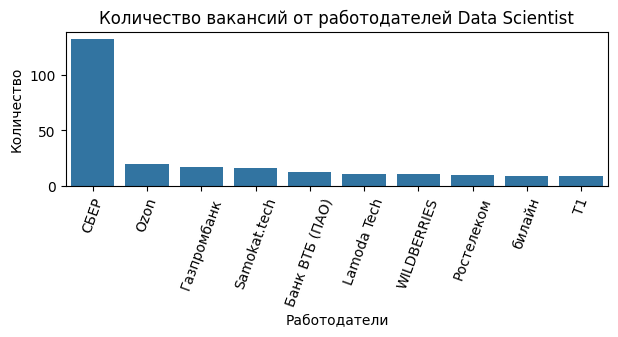

In [110]:
plt.figure(figsize=(7, 2))
sns.barplot(x='employer', y='total', data=dst_emp_10)
plt.xticks(rotation=70)
plt.xlabel('Работодатели')
plt.ylabel('Количество')
plt.title('Количество вакансий от работодателей Data Scientist')
plt.show()

Лидер по количеству вакансий для Data Scientist - Сбербанк. Также в Топ-10 входят Газпромбанк и Банк ВТБ.

In [111]:
dan_emp = dan.groupby('employer', as_index=False)[['id']].count()
dan_emp = dan_emp.rename(columns={'id':'total'}).sort_values(by='total', ascending=False)
dan_emp_10 = dan_emp.head(10)
dan_emp_10

,employer,total
137,СБЕР,67
65,WILDBERRIES,14
117,МТС,7
48,Okko,6
116,"МАГНИТ, Розничная сеть",6
155,Центр финансовых технологий,6
72,«UZUM TECHNOLOGIES».,5
129,ПСБ (ПАО «Промсвязьбанк»),5
45,Maxim technology,4
59,StudyWorld,4


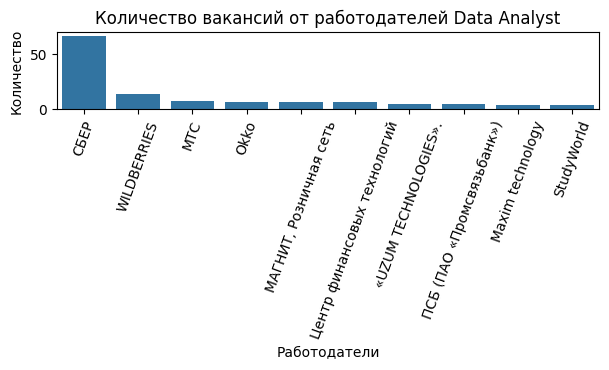

In [112]:
plt.figure(figsize=(7, 1))
sns.barplot(x='employer', y='total', data=dan_emp_10)
plt.xticks(rotation=70)
plt.xlabel('Работодатели')
plt.ylabel('Количество')
plt.title('Количество вакансий от работодателей Data Analyst')
plt.show()

Количество вакансий Data Analyst -тоже наибольшее от Сбербанка.

Рассмотрим теперь, какие работодатели размещают вакансии для каждого грейда.

In [113]:
dst_emp_jun_plus = dst_junior_plus.groupby('employer', as_index=False)[['id']].count()
dst_emp_jun_plus = dst_emp_jun_plus.rename(columns={'id':'total'}).sort_values(by='total', ascending=False)
dst_emp_10_jun_plus = dst_emp_jun_plus.head(10)
dst_emp_10_jun_plus

,employer,total
94,СБЕР,60
93,Ростелеком,10
41,Банк ВТБ (ПАО),8
0,1221Системс,7
26,Samokat.tech,7
98,Сахалин - Остров Возможностей,7
55,Газпромбанк,7
82,ПКБ,6
123,билайн,6
1,ARK,5


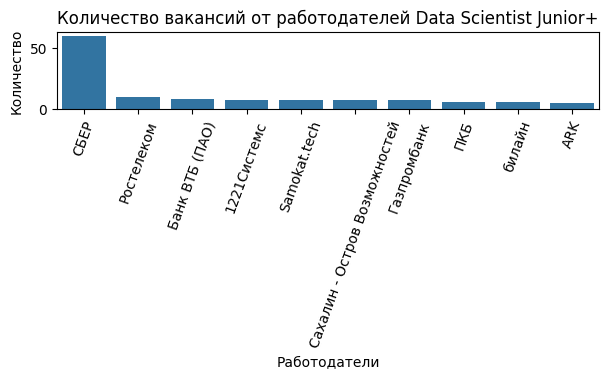

In [114]:
plt.figure(figsize=(7, 1))
sns.barplot(x='employer', y='total', data=dst_emp_10_jun_plus)
plt.xticks(rotation=70)
plt.xlabel('Работодатели')
plt.ylabel('Количество')
plt.title('Количество вакансий от работодателей Data Scientist Junior+')
plt.show()

Лидер по количеству вакансий Data Scientist Junior+ - Сбербанк. Также в Топ-10 находятся Банк ВТБ и Газпромбанк

In [115]:
dst_emp_jun = dst_junior.groupby('employer', as_index=False)[['id']].count()
dst_emp_jun = dst_emp_jun.rename(columns={'id':'total'}).sort_values(by='total', ascending=False)
dst_emp_jun.head(10)

,employer,total
11,СБЕР,9
3,Ozon,3
2,Lamoda Tech,2
9,Правительство Москвы,2
0,Changellenge,1
1,Headwise LLC,1
4,Samokat.tech,1
5,АДВ,1
6,Альфа-Банк,1
7,Банк Русский Стандарт,1


In [116]:
dst_emp_3_jun = dst_emp_jun.head(3)

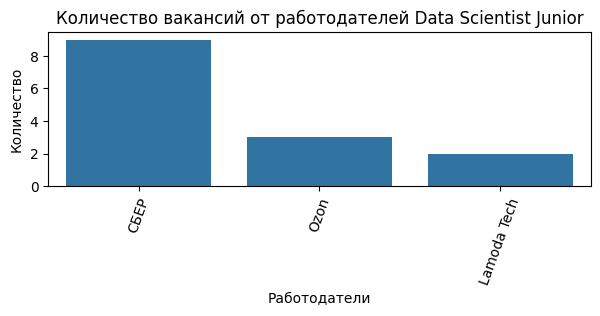

In [117]:
plt.figure(figsize=(7, 2))
sns.barplot(x='employer', y='total', data=dst_emp_3_jun)
plt.xticks(rotation=70)
plt.xlabel('Работодатели')
plt.ylabel('Количество')
plt.title('Количество вакансий от работодателей Data Scientist Junior')
plt.show()

Количество вакансий Data Scientist Junior тоже наибольшее от Сбербанка.

In [118]:
dst_emp_mid = dst_middle.groupby('employer', as_index=False)[['id']].count()
dst_emp_mid = dst_emp_mid.rename(columns={'id':'total'}).sort_values(by='total', ascending=False)
dst_emp_mid.head(10)

,employer,total
105,СБЕР,61
25,Ozon,13
59,Газпромбанк,10
39,WILDBERRIES,9
17,Lamoda Tech,9
31,Samokat.tech,8
63,ДОМ.РФ,7
101,Райффайзен Банк,5
23,Okko,5
13,HeadHunter,5


In [119]:
dst_emp_7_mid = dst_emp_mid.head(7)

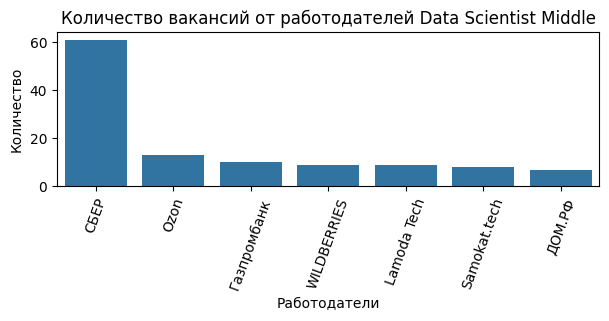

In [120]:
plt.figure(figsize=(7, 2))
sns.barplot(x='employer', y='total', data=dst_emp_7_mid)
plt.xticks(rotation=70)
plt.xlabel('Работодатели')
plt.ylabel('Количество')
plt.title('Количество вакансий от работодателей Data Scientist Middle')
plt.show()

Для специалистов Data Scientist Middle топ работодателей тоже возглавляет Сбербанк. Газпромбанк на третьем месте.

In [121]:
dst_emp_sen = dst_senior.groupby('employer', as_index=False)[['id']].count()
dst_emp_sen = dst_emp_sen.rename(columns={'id':'total'}).sort_values(by='total', ascending=False)
dst_emp_sen.head(10)

,employer,total
18,СБЕР,2
2,Aramco Innovations,2
3,Fundraise Up,2
6,Sape,2
11,БиАйЭй-Технолоджиз,1
17,"РУСАЛ, Центр подбора персонала",1
16,РСХБ-Интех,1
15,Мокка,1
14,Консалтика,1
13,Гудфокаст,1


In [122]:
dst_emp_4_sen = dst_emp_sen.head(4)

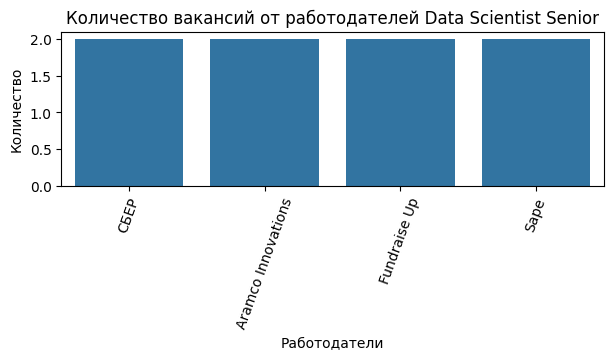

In [123]:
plt.figure(figsize=(7, 2))
sns.barplot(x='employer', y='total', data=dst_emp_4_sen)
plt.xticks(rotation=70)
plt.xlabel('Работодатели')
plt.ylabel('Количество')
plt.title('Количество вакансий от работодателей Data Scientist Senior')
plt.show()

Количество вакансий от работодателей Data Scientist Senior в целом мало для анализа.

<a id="8"></a>
### Топ работодателей для Data Analyst

In [124]:
dan_emp_jun_plus = dan_junior_plus.groupby('employer', as_index=False)[['id']].count()
dan_emp_jun_plus = dan_emp_jun_plus.rename(columns={'id':'total'}).sort_values(by='total', ascending=False)
##dan_emp_10_jun_plus = dan_emp_jun_plus.head(10)
##dan_emp_10_jun_plus
dan_emp_jun_plus.head(15)

,employer,total
78,СБЕР,42
64,МТС,6
93,Центр финансовых технологий,5
63,"МАГНИТ, Розничная сеть",5
73,ПСБ (ПАО «Промсвязьбанк»),5
32,StudyWorld,4
27,Okko,4
8,Finstar Financial Group,3
91,ЦРТ | Группа компаний,3
36,WILDBERRIES,3


In [125]:
dan_emp_10_jun_plus = dan_emp_jun_plus.head(10)

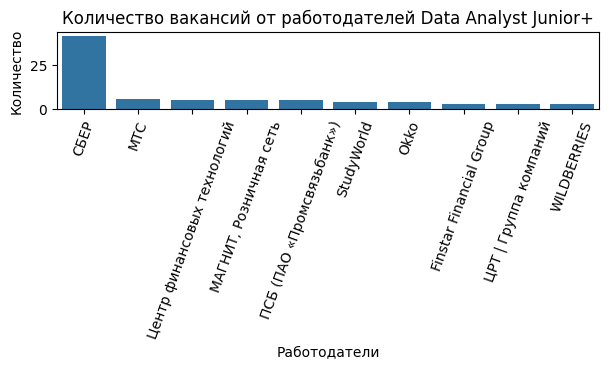

In [126]:
plt.figure(figsize=(7, 1))
sns.barplot(x='employer', y='total', data=dan_emp_10_jun_plus)
plt.xticks(rotation=70)
plt.xlabel('Работодатели')
plt.ylabel('Количество')
plt.title('Количество вакансий от работодателей Data Analyst Junior+')
plt.show()

Для Data Analyst Junior+ наибольшее количество вакансий от Сбербанка. На пятом месте Промсвязьбанк.

In [127]:
dan_emp_jun = dan_junior.groupby('employer', as_index=False)[['id']].count()
dan_emp_jun = dan_emp_jun.rename(columns={'id':'total'}).sort_values(by='total', ascending=False)
dan_emp_jun

,employer,total
6,"РЕСО-Гарантия, САО",2
0,ANCOR,1
1,Appie.tech,1
2,DNS Технологии,1
3,TradingView,1
4,Альфа Капитал,1
5,Компания CADesign,1
7,СБЕР,1


In [128]:
dan_emp_mid = dan_middle.groupby('employer', as_index=False)[['id']].count()
dan_emp_mid = dan_emp_mid.rename(columns={'id':'total'}).sort_values(by='total', ascending=False)
dan_emp_mid.head(15)

,employer,total
64,СБЕР,24
31,WILDBERRIES,11
37,«UZUM TECHNOLOGIES».,5
21,Maxim technology,4
19,MIGX GmbH,2
60,Московская Биржа,2
29,USETECH,2
25,Playrix,2
50,Звук,2
23,Okko,2


In [129]:
dan_emp_4_mid = dan_emp_mid.head(4)

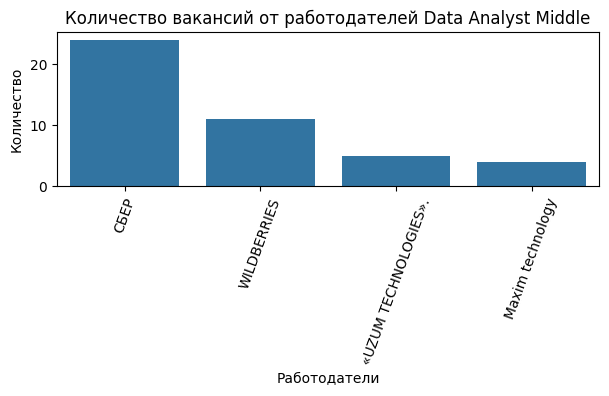

In [130]:
plt.figure(figsize=(7, 2))
sns.barplot(x='employer', y='total', data=dan_emp_4_mid)
plt.xticks(rotation=70)
plt.xlabel('Работодатели')
plt.ylabel('Количество')
plt.title('Количество вакансий от работодателей Data Analyst Middle')
plt.show()

Лидер по количеству вакансий Сбербанк, а на втором месте WILDBERRIES.

In [131]:
dan_emp_sen = dan_senior.groupby('employer', as_index=False)[['id']].count()
dan_emp_sen = dan_emp_sen.rename(columns={'id':'total'}).sort_values(by='total', ascending=False)
dan_emp_sen

,employer,total
1,Леруа Мерлен,2
0,Reinvent Baltics,1


Данных для специалистов Senior мало.

<a id="9"></a>
### Заработная плата Data Scientist

In [132]:
dst_junior_plus['salary_from'].describe()

count        23.000000
mean     131000.000000
std       48776.857404
min       50000.000000
25%      100000.000000
50%      130000.000000
75%      150000.000000
max      210000.000000
Name: salary_from, dtype: float64

In [133]:
dst_junior['salary_from'].describe()

count        2.000000
mean     47500.000000
std      31819.805153
min      25000.000000
25%      36250.000000
50%      47500.000000
75%      58750.000000
max      70000.000000
Name: salary_from, dtype: float64

In [134]:
dst_middle['salary_from'].describe()

count        27.000000
mean     205574.074074
std       74080.998252
min       93500.000000
25%      150000.000000
50%      200000.000000
75%      250000.000000
max      350000.000000
Name: salary_from, dtype: float64

In [135]:
dst_senior['salary_from'].describe()

count         1.0
mean     160000.0
std           NaN
min      160000.0
25%      160000.0
50%      160000.0
75%      160000.0
max      160000.0
Name: salary_from, dtype: float64

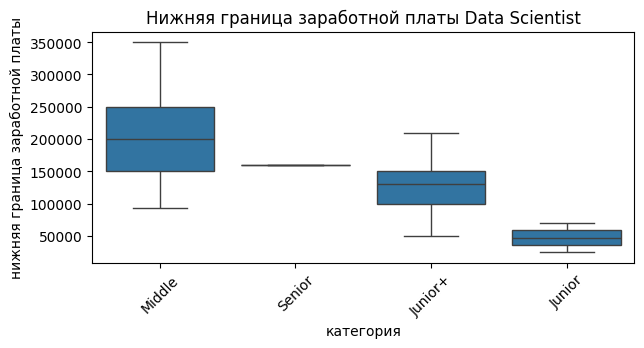

In [136]:
plt.figure(figsize=(7, 3))
dst_median_from = dst.groupby(['experience'])['salary_from'].median().sort_values(ascending=False)
ax = sns.boxplot(x='experience', y='salary_from', data=dst, order=dst_median_from.index)
plt.xticks(rotation=45)
plt.xlabel('категория')
plt.ylabel('нижняя граница заработной платы')
plt.title('Нижняя граница заработной платы Data Scientist')
plt.show()

Самая высокая нижняя граница заработной платы у Data Scientist Middle, медианное значение 200000. Наименьшее значение у Data Scientist Junior, около 50000. Данных для Data Scientist Senior мало.

In [137]:
dst_junior_plus['salary_to'].describe()

count        28.000000
mean     234642.857143
std      105074.299739
min       30000.000000
25%      167500.000000
50%      250000.000000
75%      312500.000000
max      350000.000000
Name: salary_to, dtype: float64

In [138]:
dst_junior['salary_to'].describe()

count        1.0
mean     80000.0
std          NaN
min      80000.0
25%      80000.0
50%      80000.0
75%      80000.0
max      80000.0
Name: salary_to, dtype: float64

In [139]:
dst_middle['salary_to'].describe()

count        24.000000
mean     298922.916667
std      106059.028867
min      140250.000000
25%      213800.000000
50%      300000.000000
75%      350000.000000
max      500000.000000
Name: salary_to, dtype: float64

In [140]:
dst_senior['salary_to'].describe()

count         3.000000
mean     346666.666667
std      184481.254694
min      190000.000000
25%      245000.000000
50%      300000.000000
75%      425000.000000
max      550000.000000
Name: salary_to, dtype: float64

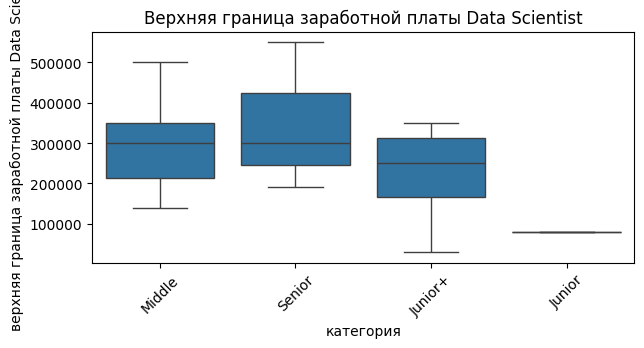

In [141]:
dst_median_to = dst.groupby(['experience'])['salary_to'].median().sort_values(ascending=False)
plt.figure(figsize=(7, 3))
ax = sns.boxplot(x='experience', y='salary_to', data=dst, order=dst_median_to.index)
plt.xticks(rotation=45)
plt.xlabel('категория')
plt.ylabel('верхняя граница заработной платы Data Scientist')
plt.title('Верхняя граница заработной платы Data Scientist')
plt.show()

Медианные значения верней границы заработной платы категорий Senior и Middle равны 300000. Минимальное и максимальное значение для Senior выше. Для Junior мало данных.

<a id="10"></a>
### Заработная плата Data Analyst

In [142]:
dan_junior['salary_from'].describe()

count        1.0
mean     60000.0
std          NaN
min      60000.0
25%      60000.0
50%      60000.0
75%      60000.0
max      60000.0
Name: salary_from, dtype: float64

In [143]:
dan_junior_plus['salary_from'].describe()

count        20.000000
mean     143050.000000
std       35865.941915
min       80000.000000
25%      107500.000000
50%      150000.000000
75%      180000.000000
max      187000.000000
Name: salary_from, dtype: float64

In [144]:
dan_middle['salary_from'].describe()

count         7.000000
mean     238064.285714
std       88543.231975
min      120000.000000
25%      185000.000000
50%      200000.000000
75%      313225.000000
max      350000.000000
Name: salary_from, dtype: float64

In [145]:
dan_senior['salary_from'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: salary_from, dtype: float64

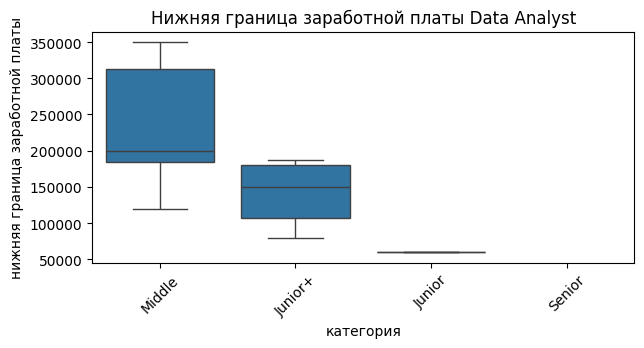

In [146]:
dan_median_from = dan.groupby(['experience'])['salary_from'].median().sort_values(ascending=False)
plt.figure(figsize=(7, 3))
ax = sns.boxplot(x='experience', y='salary_from', data=dan, order=dan_median_from.index)
plt.xticks(rotation=45)
plt.xlabel('категория')
plt.ylabel('нижняя граница заработной платы')
plt.title('Нижняя граница заработной платы Data Analyst')
plt.show()

Для категорий Senior и Junior нет данных. Медиана нижней границы заработной платы  Middle равна 200000, категории Junior+ 150000.

In [147]:
dan_junior['salary_to'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: salary_to, dtype: float64

In [148]:
dan_junior_plus['salary_to'].describe()

count        15.000000
mean     184066.666667
std       57540.317128
min       90000.000000
25%      140000.000000
50%      200000.000000
75%      210000.000000
max      280500.000000
Name: salary_to, dtype: float64

In [149]:
dan_middle['salary_to'].describe()

count        10.000000
mean     350220.000000
std      103984.342304
min      200000.000000
25%      262500.000000
50%      375000.000000
75%      415562.500000
max      495550.000000
Name: salary_to, dtype: float64

In [150]:
dan_senior['salary_to'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: salary_to, dtype: float64

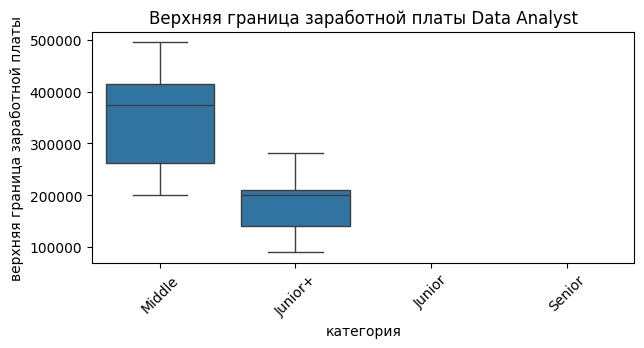

In [151]:
dan_median_to = dan.groupby(['experience'])['salary_to'].median().sort_values(ascending=False)
plt.figure(figsize=(7, 3))
ax = sns.boxplot(x='experience', y='salary_to', data=dan, order=dan_median_to.index)
plt.xticks(rotation=45)
plt.xlabel('категория')
plt.ylabel('верхняя граница заработной платы')
plt.title('Верхняя граница заработной платы Data Analyst')
plt.show()

Для категорий Senior и  Junior данных нет. Медиана верхней границы заработной платы категории Middle равна 375000, категории Junior+ 200000.

In [152]:
dst_sal_gr = dst.pivot_table(index='salary_bin', columns='experience', values='id',aggfunc='count')
dst_sal_gr

experience,Junior,Junior+,Middle,Senior
salary_bin,,,,
Больше 300 тысяч,NaN,13.0,14.0,2.0
ЗП не указана,25.0,261.0,300.0,20.0
Меньше 100 тысяч,1.0,4.0,NaN,NaN
От 100 тысяч до 200 тысяч,NaN,4.0,3.0,1.0
От 200 тысяч до 300 тысяч,NaN,7.0,7.0,NaN


In [153]:
dan_sal_gr = dan.pivot_table(index='salary_bin', columns='experience', values='id',aggfunc='count')
dan_sal_gr

experience,Junior,Junior+,Middle,Senior
salary_bin,,,,
Больше 300 тысяч,NaN,NaN,7.0,NaN
ЗП не указана,9.0,163.0,110.0,3.0
Меньше 100 тысяч,NaN,1.0,NaN,NaN
От 100 тысяч до 200 тысяч,NaN,6.0,NaN,NaN
От 200 тысяч до 300 тысяч,NaN,8.0,3.0,NaN


Из-за большого количества пропусков в данных о категориях заработной платы анализ не результативен.

<a id="11"></a>
### Занятость и график работы

In [154]:
dst_emp = dst.groupby('employment', as_index=False)[['id']].count()
dst_emp = dst_emp.sort_values(by='id',ascending=False)
dst_emp

,employment,id
0,Полная занятость,646
2,Стажировка,12
1,Проектная работа,2
3,Частичная занятость,2


In [155]:
dst_emp_gr = dst.pivot_table(index='employment', columns='experience', values='id',aggfunc='count')
dst_emp_gr

experience,Junior,Junior+,Middle,Senior
employment,,,,
Полная занятость,14.0,286.0,323.0,23.0
Проектная работа,NaN,2.0,NaN,NaN
Стажировка,12.0,NaN,NaN,NaN
Частичная занятость,NaN,1.0,1.0,NaN


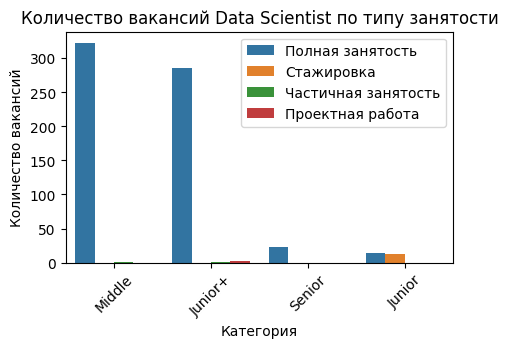

In [156]:
plt.figure(figsize=(5, 3))
sns.countplot(x='experience', hue='employment', data=dst)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.xlabel('Категория')
plt.ylabel('Количество вакансий')
plt.title('Количество вакансий Data Scientist по типу занятости')
plt.show()

In [157]:
dst_empl= dst.groupby('employment', as_index=False)[['id']].count()
dst_empl = dst_empl.rename(columns={'id':'total'}).sort_values(by='total', ascending=False)
dst_empl

,employment,total
0,Полная занятость,646
2,Стажировка,12
1,Проектная работа,2
3,Частичная занятость,2


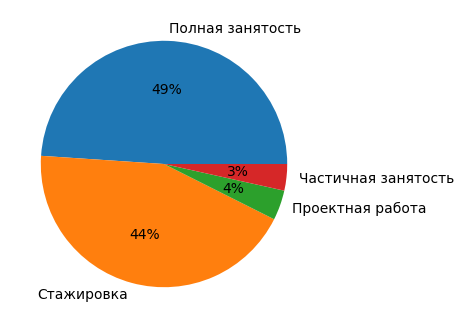

In [158]:
plt.figure(figsize=(6, 4))
plt.pie(dst_gr['total'], labels=dst_empl['employment'], autopct='%.0f%%')
plt.show()

В большинстве вакансий Data Scientist требуется полная занятость, в единичных случаях - частичная, для Junior примерно а половине вакансий предусмотрена стажировка.

In [159]:
dan_emp = dan.groupby('employment', as_index=False)[['id']].count()
dan_emp = dan_emp.sort_values(by='id',ascending=False)
dan_emp

,employment,id
0,Полная занятость,308
1,Частичная занятость,2


In [160]:
dan_emp_gr = dan.pivot_table(index='employment', columns='experience', values='id',aggfunc='count')
dan_emp_gr

experience,Junior,Junior+,Middle,Senior
employment,,,,
Полная занятость,9.0,177.0,119.0,3.0
Частичная занятость,NaN,1.0,1.0,NaN


Во всех вакансиях, кроме двух, для Data Analyst заявлена полная занятость.

In [161]:
dan_empl= dan.groupby('employment', as_index=False)[['id']].count()
dan_empl = dan_empl.rename(columns={'id':'total'}).sort_values(by='total', ascending=False)
dan_empl

,employment,total
0,Полная занятость,308
1,Частичная занятость,2


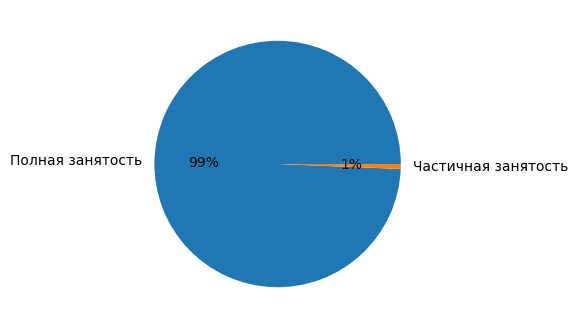

In [162]:
plt.figure(figsize=(6, 4))
plt.pie(dan_empl['total'], labels=dan_empl['employment'], autopct='%.0f%%')
plt.show()

In [163]:
dst_sch = dst.groupby('schedule', as_index=False)[['id']].count()
dst_sch = dst_sch.sort_values(by='id',ascending=False)
dst_sch

,schedule,id
1,Полный день,508
3,Удаленная работа,119
0,Гибкий график,32
2,Сменный график,3


In [164]:
dst_sch_gr = dst.pivot_table(index='schedule', columns='experience', values='id',aggfunc='count')
dst_sch_gr

experience,Junior,Junior+,Middle,Senior
schedule,,,,
Гибкий график,5.0,8.0,17.0,2.0
Полный день,19.0,217.0,256.0,16.0
Сменный график,NaN,1.0,1.0,1.0
Удаленная работа,2.0,63.0,50.0,4.0


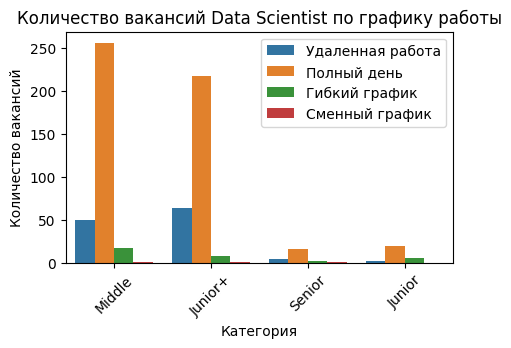

In [165]:
plt.figure(figsize=(5, 3))
sns.countplot(x='experience', hue='schedule', data=dst)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.xlabel('Категория')
plt.ylabel('Количество вакансий')
plt.title('Количество вакансий Data Scientist по графику работы')
plt.show()

Для всех грейдов присутствуют все виды рабочего графика, но в большинстве - полная, на втором месте - удаленная работа, но для Junior - гибкий график.

In [166]:
dan_sch = dan.groupby('schedule', as_index=False)[['id']].count()
dan_sch = dan_sch.sort_values(by='id',ascending=False)
dan_sch

,schedule,id
1,Полный день,236
3,Удаленная работа,63
0,Гибкий график,7
2,Сменный график,4


In [167]:
dan_sch_gr = dan.pivot_table(index='schedule', columns='experience', values='id',aggfunc='count')
dan_sch_gr

experience,Junior,Junior+,Middle,Senior
schedule,,,,
Гибкий график,NaN,5.0,2.0,NaN
Полный день,8.0,135.0,91.0,2.0
Сменный график,1.0,3.0,NaN,NaN
Удаленная работа,NaN,35.0,27.0,1.0


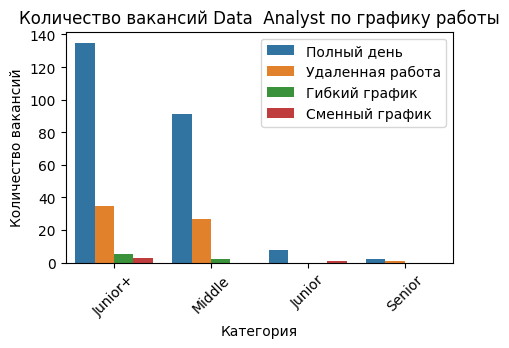

In [168]:
plt.figure(figsize=(5, 3))
sns.countplot(x='experience', hue='schedule', data=dan)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.xlabel('Категория')
plt.ylabel('Количество вакансий')
plt.title('Количество вакансий Data  Analyst по графику работы')
plt.show()

Полный день указан в большинстве вакансий Data  Analyst, на втором месте - удаленная работа.

<a id="12"></a>
### Распределение вакансий по месяцам и дням недели

In [169]:
dst_month_gr = dst.pivot_table(index='month', columns='experience', values='id',aggfunc='count')
dst_month_gr

experience,Junior,Junior+,Middle,Senior
month,,,,
2,NaN,NaN,NaN,1.0
3,13.0,104.0,105.0,6.0
4,13.0,185.0,219.0,16.0


In [170]:
dan_month_gr = dan.pivot_table(index='month', columns='experience', values='id',aggfunc='count')
dan_month_gr

experience,Junior,Junior+,Middle,Senior
month,,,,
3,2.0,47.0,36.0,NaN
4,7.0,131.0,84.0,3.0


Количество вакансий в течение двух месяцев увеличивается для всех грейдов, кроме Data Scientist Junior. Можно предположить, что накапливается. Но два месяца - недостаточно большой срок для выводов. Посмотрим, как публиковались вакансии по дням недели.

In [171]:
dst_day_gr = dst.pivot_table(index='day_week', columns='experience', values='id',aggfunc='count')
dst_day_gr

experience,Junior,Junior+,Middle,Senior
day_week,,,,
0,5.0,87.0,82.0,7.0
1,5.0,49.0,68.0,4.0
2,5.0,49.0,41.0,3.0
3,6.0,50.0,62.0,3.0
4,2.0,31.0,41.0,3.0
5,2.0,11.0,21.0,NaN
6,1.0,12.0,9.0,3.0


In [172]:
dan_day_gr = dan.pivot_table(index='day_week', columns='experience', values='id',aggfunc='count')
dan_day_gr

experience,Junior,Junior+,Middle,Senior
day_week,,,,
0,3.0,52.0,18.0,1.0
1,1.0,26.0,28.0,NaN
2,NaN,32.0,20.0,NaN
3,1.0,24.0,17.0,NaN
4,2.0,18.0,14.0,NaN
5,1.0,12.0,12.0,NaN
6,1.0,14.0,11.0,2.0


Можно сделать вывод, что в первой половине недели, особенно в понедельник, публикация вакансий происходит наиболее активно.

<a id="sum"></a>
## 3.Выводы

Всего в рассмотрении были данные о 662 вакансиях Data Scientist  и 310 вакансиях Data Analyst. Доли категорий (грейдов) для Data Scientist: 49% - middle, 44%- junior+, 4%- junior, 3%- senior.  Data Analyst: 57% - junior+, 39% - middle, 3% - junior, 1% - senior.

Обобщим данные об ожидаемых навыках кандидатов по отдельным грейдам Data Scientist
Junior (данных мало): hard skills - анализ данных, математическая статистика, машинное обучение, python.
soft skills - документация, аналитическое мышление, презентация. 
Junior+ : hard skills - машинное обучение, sql, python, анализ данных, pandas.
soft skills - документация, коммуникация, креативность.
Middle: hard skills - машинное обучение, sql, python, data science, pandas.
soft skills - коммуникация, документация, аналитическое мышление.
Senior (данных мало): hard skills - машинное обучение, анализ данных, python.
soft skills - коммуникация, документация, презентация.
По грейдам Data Analyst.
Junior (данных мало): hard skills - python, sql, анализ данных.
soft skills -  аналитическое мышление, коммуникация.
Junior+ : hard skills -  анализ данных, python, sql, power bi, базы данных.
soft skills -  документация, коммуникация,  аналитическое мышление.
Middle: hard skills - анализ данных, python, sql, big data, postgresql, базы данных, power bi.
soft skills - коммуникация, документация, проактивность.
Senior (данных мало): hard skills - анализ данных, python, sql.

Опишем типичное место работы для Data Scientist и Data Analyst. Перечислим основных работодателей- лидеров по числу вакансий. Для грейдов Data Scientist: 
Junior: СБЕР, Ozon, Lamoda, Правительство Москвы.
Junior+ :СБЕР, Ростелеком, Банк ВТБ.
Middle: СБЕР, Ozon, Газпромбанк, WILDBERRIES, Lamoda.
Senior (данных мало): СБЕР, а также другие работодатели, не представленные для остальных грейдов.
Мы видим, что по количеству вакансий лидирует СБЕР и в топе несколько банков.
Для грейдов Data Analyst:
Junior (данных мало): РЕСО-Гарантия,
Junior+ : СБЕР, МТС, Центр финансовых технологий, МАГНИТ, Промсвязьбанк.
Middle: СБЕР, WILDBERRIES, Maxim Technology.
Senior (данных мало): Леруа Мерлен.

Выводы о заработной плате: нижняя и верхняя границы указаны не для всех вакансий и зачастую указана одна характеристика. Приведем для каждого грейда Data Scientist. Итак, медианные значения:
Junior+ : нижняя граница 130000, верхняя 250000.
Middle: нижняя граница 200000, верхняя 300000.
Для Junior и Senior только по одной вакансии - мало данных.
Медианные значения для Data Analyst:
Junior+ : нижняя граница 150000, верхняя 200000.
Middle: нижняя граница 200000, верхняя 375000.
Для Junior и Senior нет данных.

Занятость: для всех категорий Data Scientist требуется полная занятость почти во всех вакансиях. Исключение- Junior, примерно в половине вакансия указана стажировка. В подавляющем числе вакансий  Data Analyst - полная занятость.
В большинстве вакансий требуется полный рабочий день.